 Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Загрузка данных из CSV файла
data = pd.read_csv("BostonHousing.csv") 

# Создание Pandas DataFrame из данных
boston = pd.DataFrame(data)

# Вывод первых 5 строк DataFrame 
boston.head() 


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# 3. Создание датафреймов X и y
X = boston.drop('medv', axis=1)  # Все столбцы, кроме 'medv'
y = boston['medv']           # Только столбец 'medv' 

# Проверка размеров DataFrame X и y 
print(X.shape)
print(y.shape)

(506, 13)
(506,)


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [7]:
from sklearn.model_selection import train_test_split

# 4. Разделение на тренировочный и тестовый наборы данных
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Проверка размеров получившихся выборок
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(404, 13) (404,)
(102, 13) (102,)


Масштабируйте данные с помощью StandardScaler.

In [10]:
from sklearn.preprocessing import StandardScaler

# 5. Масштабирование данных
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 


Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42

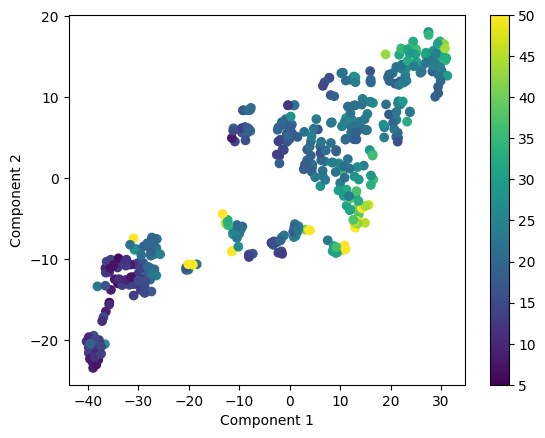

In [11]:
from sklearn.manifold import TSNE
# 6. Построение модели t-SNE
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train)
# Визуализация результатов t-SNE
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()

Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [17]:
from sklearn.cluster import KMeans

# 7. Кластеризация данных с помощью KMeans
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
labels_train = kmeans.fit_predict(X_train)

# Вывод меток кластеров для первых 10 объектов
labels_train[:10]


c:\Program Files\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 1, 2, 0, 1, 1, 1, 2, 0, 0])

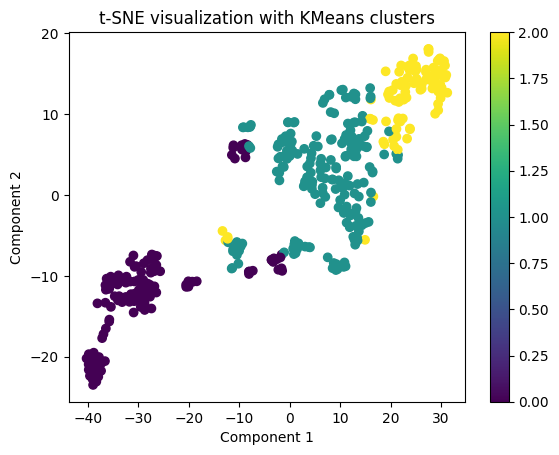

In [16]:
# Визуализация результатов t-SNE с раскраской по кластерам
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.title('t-SNE visualization with KMeans clusters')
plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [18]:
# Создание DataFrame для удобства анализа
df_train = pd.DataFrame(X_train, columns=[
                       'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
df_train['price'] = y_train  # добавляем целевую переменную 'price'
df_train['cluster'] = labels_train  # добавляем метки кластеров

# Вычисление средних значений price и CRIM для каждого кластера
cluster_means = df_train.groupby('cluster')[['price', 'CRIM']].mean()

cluster_means


,price,CRIM
cluster,,
0,24.070000,0.810904
1,24.708974,-0.359594
2,24.046575,-0.398864


#Задание 3 Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [19]:
# 8. Предсказание меток кластеров для тестовых данных
labels_test = kmeans.predict(X_test)

# Создание DataFrame для тестовых данных
df_test = pd.DataFrame(X_test, columns=[
                      'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
df_test['price'] = y_test
df_test['cluster'] = labels_test

# Вычисление средних значений price и CRIM для каждого кластера в тестовых данных
cluster_means_test = df_test.groupby('cluster')[['price', 'CRIM']].mean()

cluster_means_test


,price,CRIM
cluster,,
0,23.588889,0.739661
1,21.978571,-0.377146
2,21.320000,-0.400162
